In [1]:
from nepc import nepc
import numpy as np
import matplotlib.pyplot as plt
from nepc.methods.wunderlich.gryzinski import gryzinski as gryzinski

In [2]:
INCIDENT_ENERGY = [16.0, 16.5, 17.0, 17.5, 18.0, 18.5, 19.0, 19.5, 20.0, 20.5, 21.0, 21.5, 22.0, 22.5, 23.0, 23.5, 24.0, 24.5, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0, 75.0, 80.0, 85.0, 90.0, 95.0, 100.0, 110.0, 120.0, 140.0, 160.0, 180.0, 200.0, 225.0, 250.0, 275.0, 300.0, 350.0, 400.0, 450.0, 500.0, 550.0, 600.0, 650.0, 700.0, 750.0, 800.0, 850.0, 900.0, 950.0, 1000.0]

In [3]:
sigma_naught = 6.56e-18

def gryzinski(N_e, E_e, E_thr, epsilon):
    """returns the cross section in terms of m^2
       N_e: the effective number of equivalent electrons in the inital state of the transistion
       E_e: inital energy of the impinging electron
       E_thr: lower limit of the energy gain or threshold energy
       epsilon: initial kinetic energy of the orbital electron to be excited; can be set to the ionization potential"""
    sigma = ((N_e * sigma_naught / E_thr**2) * np.sqrt(epsilon**2 * E_e / (epsilon + E_e)**3) * 
            (1 - (E_thr / E_e))**((2*epsilon + E_thr) / (epsilon + E_thr)) * 
            ((E_thr / epsilon) + (2 / 3) * (1 - (E_thr / (2 * E_e))) * np.log(np.exp(1) + np.sqrt((E_e - E_thr) / epsilon))))
    
    return sigma

In [12]:
sigma = gryzinski("N2(X1Sigmag+)", "N2+(X2Sigmag+)", 0, 2, 0.917, INCIDENT_ENERGY, epsilon=15.581)

/home/djwatkins/projects/nepc/nepc/methods/wunderlich/gryzinski.py:38: RuntimeWarning: invalid value encountered in double_scalars
  sigma = np.float64((N_e * sigma_naught / E_thr**2) * np.sqrt(epsilon**2 * E_e / (epsilon + E_e)**3) * (1 - (E_thr / E_e))**((2*epsilon + E_thr) / (epsilon + E_thr)) * ((E_thr / epsilon) + (2 / 3) * (1 - (E_thr / (2 * E_e))) * np.log(np.exp(1) + np.sqrt((E_e - E_thr) / epsilon))))
/home/djwatkins/projects/nepc/nepc/methods/wunderlich/gryzinski.py:38: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.float64((N_e * sigma_naught / E_thr**2) * np.sqrt(epsilon**2 * E_e / (epsilon + E_e)**3) * (1 - (E_thr / E_e))**((2*epsilon + E_thr) / (epsilon + E_thr)) * ((E_thr / epsilon) + (2 / 3) * (1 - (E_thr / (2 * E_e))) * np.log(np.exp(1) + np.sqrt((E_e - E_thr) / epsilon))))


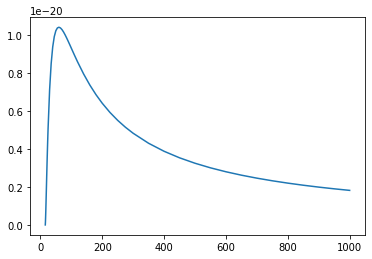

In [11]:
plt.plot(sigma[0], sigma[1])